### Assignment 1-

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('nba_2013.csv')
pd.pandas.set_option('display.max_columns', None)

In [74]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [75]:
df.shape

(481, 31)

#### Total null values

In [76]:
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

#### Percentage wise null values

In [77]:
round(df.isnull().sum()/481,2)*100

player           0.0
pos              0.0
age              0.0
bref_team_id     0.0
g                0.0
gs               0.0
mp               0.0
fg               0.0
fga              0.0
fg.              0.0
x3p              0.0
x3pa             0.0
x3p.            14.0
x2p              0.0
x2pa             0.0
x2p.             1.0
efg.             0.0
ft               0.0
fta              0.0
ft.              4.0
orb              0.0
drb              0.0
trb              0.0
ast              0.0
stl              0.0
blk              0.0
tov              0.0
pf               0.0
pts              0.0
season           0.0
season_end       0.0
dtype: float64

In [78]:
df.drop(columns=['season','season_end'], inplace= True)

In [80]:
df['x3p.'].fillna(df['x3p.'].mean(), inplace = True)

In [81]:
df['ft.'].fillna(df['ft.'].mean(), inplace = True)

In [82]:
df.dropna(inplace= True)

In [83]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,26.489540,53.562762,25.732218,1244.983264,194.085774,427.115063,0.436303,39.855649,110.809623,0.284662,154.230126,316.305439,0.466947,0.480188,91.771967,121.393305,0.721838,56.161088,163.826360,219.987448,113.232218,39.523013,24.255230,72.309623,106.527197,519.799163
std,4.197795,25.097864,29.681952,894.908887,171.695024,368.479335,0.098733,50.922621,132.890220,0.146346,147.181206,294.036769,0.104448,0.098889,103.745255,131.308142,0.156771,62.137748,145.242056,200.245331,131.134601,34.757297,30.912905,62.643013,70.948370,470.133865
min,19.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,33.250000,0.000000,392.000000,51.250000,116.250000,0.400250,0.000000,3.000000,0.259205,31.000000,70.000000,0.434719,0.451000,16.250000,23.250000,0.656250,13.000000,44.000000,57.000000,20.000000,10.000000,4.000000,21.000000,45.250000,126.000000
50%,26.000000,61.000000,10.000000,1150.000000,147.000000,335.000000,0.437500,16.500000,49.500000,0.314711,110.500000,228.500000,0.474475,0.487500,54.000000,73.500000,0.750000,36.000000,135.000000,169.000000,66.000000,32.000000,14.000000,58.000000,106.000000,402.000000
75%,29.000000,76.000000,54.750000,2016.750000,308.500000,673.500000,0.479000,68.000000,193.750000,0.366263,230.750000,462.000000,0.513729,0.525000,129.000000,180.500000,0.815750,73.750000,230.000000,310.000000,152.750000,60.000000,32.000000,108.000000,158.750000,823.250000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


In [84]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
dtype: object

In [87]:
z = [i for i in df.columns if df[i].dtypes !=object]

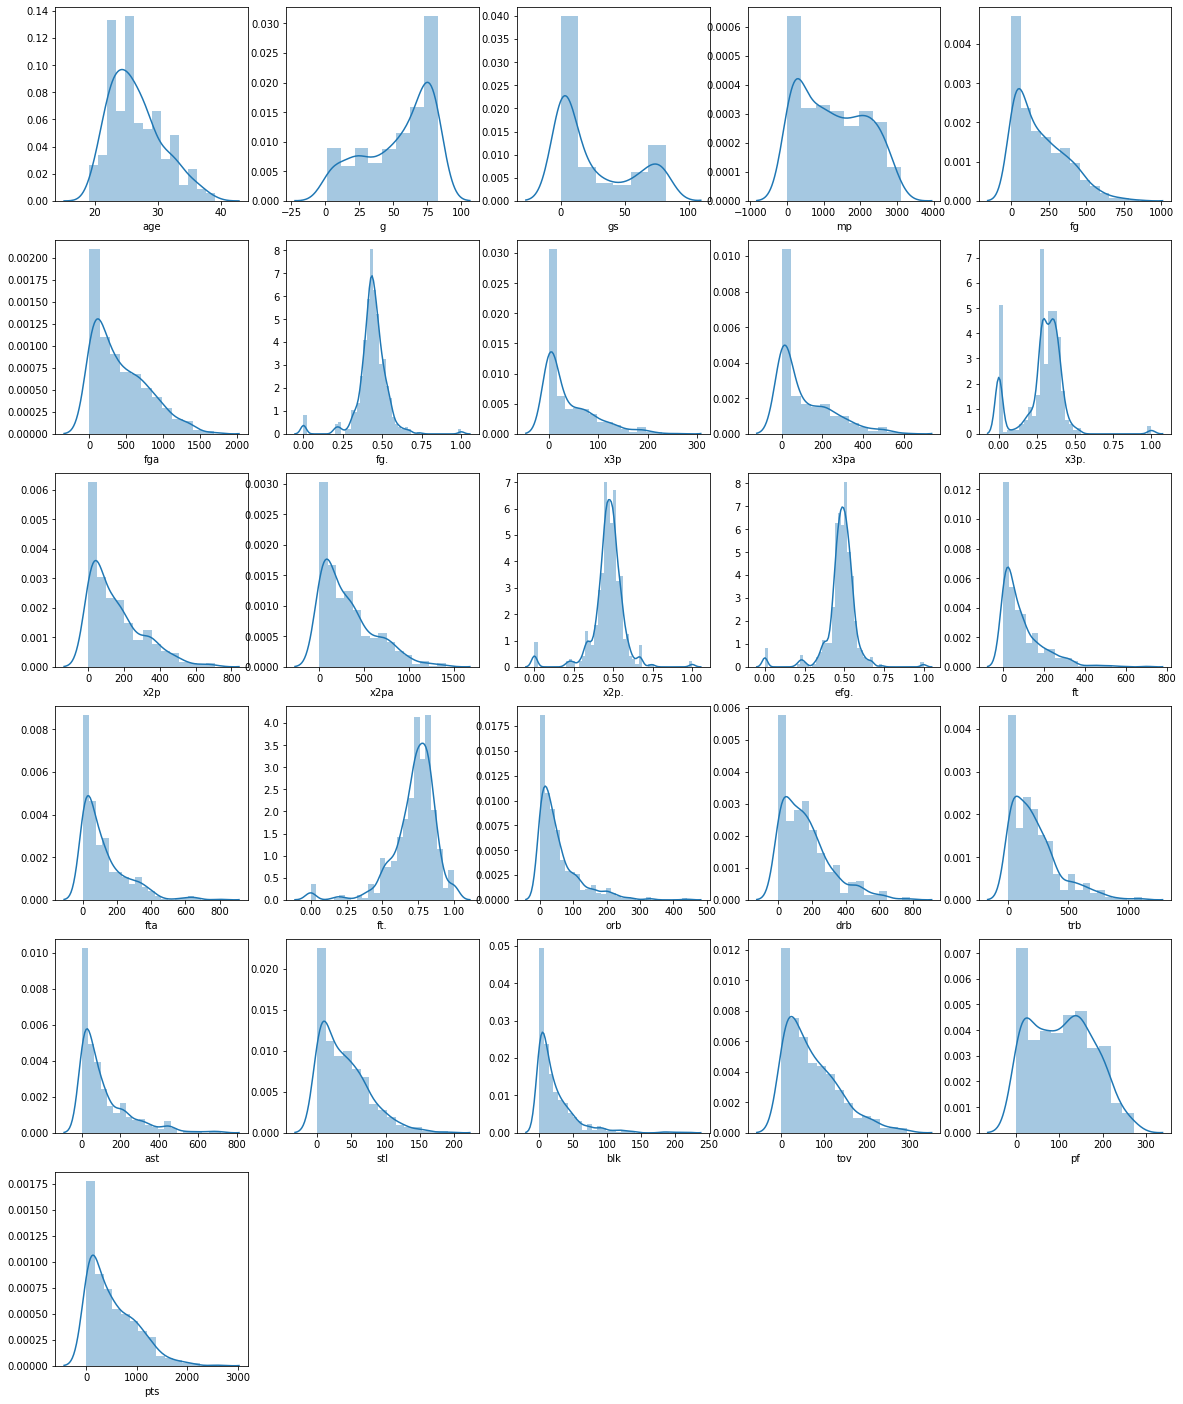

In [88]:
plt.figure(figsize=(20,25), facecolor='white')
plot = 1
for i in range(len(z)):
    if plot<28:
        ax = plt.subplot(6,5,plot)
        sns.distplot(df[z[i]])
        plt.xlabel(z[i])
    plot+=1
plt.show()

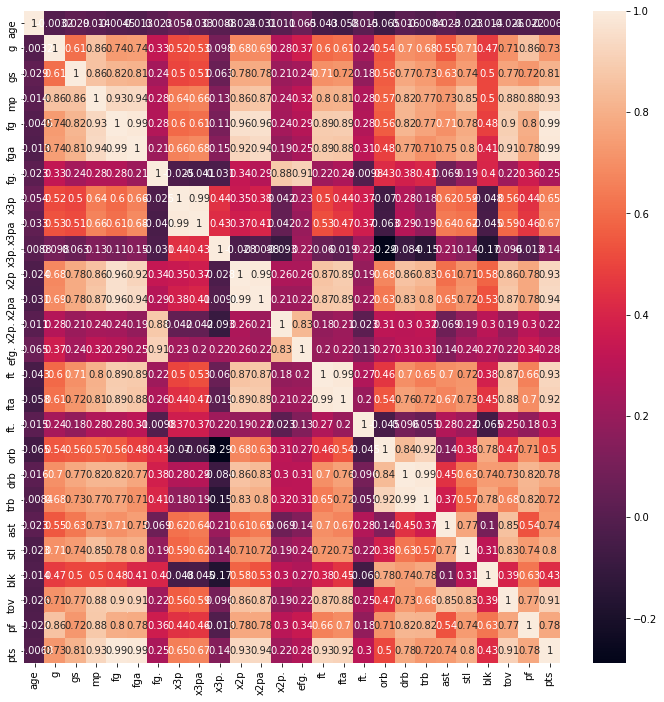

In [89]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [127]:
x = df.drop(columns=['pts'])
y = df['pts']

In [194]:
x.dtypes

age                 int64
g                   int64
gs                  int64
mp                  int64
fg                  int64
                    ...  
bref_team_id_SAS    uint8
bref_team_id_TOR    uint8
bref_team_id_TOT    uint8
bref_team_id_UTA    uint8
bref_team_id_WAS    uint8
Length: 63, dtype: object

In [128]:
x.drop(columns=['player'], inplace= True)

In [129]:
q = [i for i in x.columns if x[i].dtypes ==object]
q

['pos', 'bref_team_id']

In [130]:
x  = pd.get_dummies(x,['pos','bref_team_id'])

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [180]:
std = StandardScaler()
x_scaled = std.fit_transform(x)

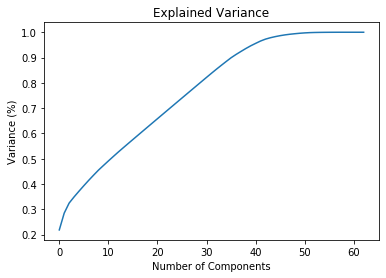

In [181]:
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [186]:
pca_com = ['pca_component_{}'.format(i) for i in range(1,41)]

In [187]:
pca = PCA(n_components = 40)
x_pca = pca.fit_transform(x_scaled)
x_pca = pd.DataFrame(x_pca, columns = pca_com)

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y, test_size= 0.25)

In [196]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [197]:
knn.score(x_train,y_train)

0.8608944733891608

In [198]:
y_pred = knn.predict(x_test)

In [209]:
np.sqrt(4)

2.0

In [210]:
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

222.0137803530823

In [206]:
metrics.r2_score(y_pred,y_test)

0.4385274581814118

In [214]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 233.78579939765376
RMSE value for k=  2 is: 225.65728070091896
RMSE value for k=  3 is: 214.4029651881743
RMSE value for k=  4 is: 223.96696068654114
RMSE value for k=  5 is: 222.0137803530823
RMSE value for k=  6 is: 223.7893354623197
RMSE value for k=  7 is: 223.4875588160966
RMSE value for k=  8 is: 218.87773145782785
RMSE value for k=  9 is: 214.5618429847688
RMSE value for k=  10 is: 213.06181340947356
RMSE value for k=  11 is: 210.5059599151046
RMSE value for k=  12 is: 204.99105925625148
RMSE value for k=  13 is: 195.56324511583637
RMSE value for k=  14 is: 193.2323813152845
RMSE value for k=  15 is: 190.91659580967695
RMSE value for k=  16 is: 190.85457052385135
RMSE value for k=  17 is: 188.13138798850693
RMSE value for k=  18 is: 184.1356068440293
RMSE value for k=  19 is: 183.3335997437836
RMSE value for k=  20 is: 182.12806992379475
RMSE value for k=  21 is: 181.44385762375026
RMSE value for k=  22 is: 180.48645775377963
RMSE value for k=  23 is: 17

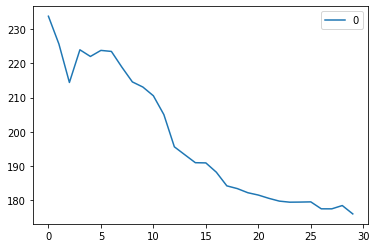

In [215]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [217]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13,14,15,16,17,18,19,20]
              }

In [218]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [219]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, 

[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=14; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, n_neighbors=14; total time=   0.0s
[CV 

[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=16; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=19; total time=   0.0s
[CV 

[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=7; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 4/5] END 

[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=14; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=14; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=14; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=14; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=15; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=15; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=15; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=15; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=15; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=16; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=16; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=16; total time=   0.0s
[CV 

[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=20; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=20; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=20; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=20; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END .algori

[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=12; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=13; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=14; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, n_neighbors=14; total time=   0.0s
[CV 3/5] END algorithm=kd_tr

[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=17; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=18; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=19; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=19; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=19; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=19; total time=   0.0s
[CV 5/5] END algorithm=kd_tr

[CV 3/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 4/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 5/5] END .algorithm=kd_tree, leaf_size=30, n_neighbors=9; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=11; total time=   0.0s
[CV 5/5] END algorithm=kd_tr

[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=16; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=17; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=17; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=17; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=17; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=17; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=19; total time=   0.0s
[CV 2/5] END algorithm=kd_tr

[CV 4/5] END ...algorithm=brute, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=18, n_neighbors=9; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=18, n_neighbors=10; total time=   0.0s
[CV 1/5] END ..algorithm=bru

[CV 1/5] END ..algorithm=brute, leaf_size=20, n_neighbors=15; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=20, n_neighbors=15; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=20, n_neighbors=15; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=20, n_neighbors=15; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=20, n_neighbors=15; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=20, n_neighbors=16; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=20, n_neighbors=16; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=20, n_neighbors=16; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=20, n_neighbors=16; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=20, n_neighbors=16; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=20, n_neighbors=17; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=20, n_neighbors=17; total time=   0.0s
[CV 3/5] END ..algorithm=bru

[CV 3/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=27, n_neighbors=3; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 5/5] END ...algorithm=brute, leaf_size=27, n_neighbors=5; total time=   0.0s
[CV 1/5] END ...algorithm=brute, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 2/5] END ...algorithm=brute, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 3/5] END ...algorithm=brute, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 4/5] END ...algorithm=brute, leaf_size=27, n_neighbors=7; total time=   0.0s
[CV 5/5] END ...algorithm=br

[CV 3/5] END ..algorithm=brute, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=30, n_neighbors=12; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=30, n_neighbors=13; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=30, n_neighbors=14; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=30, n_neighbors=14; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=30, n_neighbors=14; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=30, n_neighbors=14; total time=   0.0s
[CV 5/5] END ..algorithm=bru

[CV 3/5] END ..algorithm=brute, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=32, n_neighbors=18; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=32, n_neighbors=19; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=32, n_neighbors=19; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=32, n_neighbors=19; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=32, n_neighbors=19; total time=   0.0s
[CV 5/5] END ..algorithm=brute, leaf_size=32, n_neighbors=19; total time=   0.0s
[CV 1/5] END ..algorithm=brute, leaf_size=32, n_neighbors=20; total time=   0.0s
[CV 2/5] END ..algorithm=brute, leaf_size=32, n_neighbors=20; total time=   0.0s
[CV 3/5] END ..algorithm=brute, leaf_size=32, n_neighbors=20; total time=   0.0s
[CV 4/5] END ..algorithm=brute, leaf_size=32, n_neighbors=20; total time=   0.0s
[CV 5/5] END ..algorithm=bru

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16,
                                         17, 18, 19, 20]},
             verbose=3)

In [220]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 20}

In [246]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =40)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8231947633913363

In [247]:
y_pred = knn.predict(x_test)

In [248]:
metrics.r2_score(y_pred,y_test)

0.6704368043269304

In [249]:
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

172.24419196787645

### Assignment 2-

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.

In [250]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [262]:
container = soup.findAll("div", {"class": "home-content"})
for each_text in container:
    content = each_text.text

In [281]:
z = content.split()

In [285]:
z = {i:z.count(i) for i in z}

### Assignment 3 - 

In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.
The raw image is available in spicy.misc package with the name face.

In [300]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy import misc

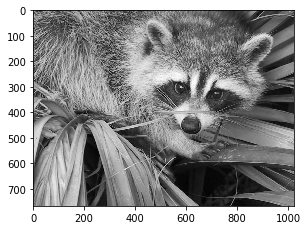

In [296]:
grey = misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(grey, cmap=plt.cm.gray)
plt.show()

In [299]:
row = grey.shape[0]
col = grey.shape[1]

In [303]:
image = grey.reshape(row*col,1)
image

array([[114],
       [130],
       [145],
       ...,
       [142],
       [141],
       [140]], dtype=uint8)

In [304]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

KMeans(n_clusters=5)

In [308]:
clusters = np.asarray(kmeans.cluster_centers_) 
clusters

array([[193.5128744 ],
       [ 72.41911807],
       [150.69120992],
       [111.16922451],
       [ 26.59547247]])

### Assignment 4 - 


In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import random


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df['target']

In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: target, Length: 150, dtype: object

In [21]:
pca =PCA(n_components=3)
pca_df = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_df,columns=['principal_component_1','principal_component_2','principal_component_3'])

In [22]:
pca_df = pd.concat([pca_df,y], axis=1)

In [23]:
pca_df

,principal_component_1,principal_component_2,principal_component_3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


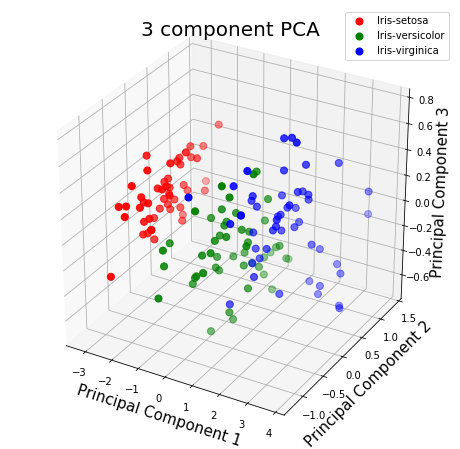

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal_component_1']
               , pca_df.loc[indicesToKeep, 'principal_component_2']
               , pca_df.loc[indicesToKeep, 'principal_component_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()